**Importing** **Libreries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploded=files.upload()

Saving leads_basic_details.csv to leads_basic_details (1).csv


In [3]:
lbd=pd.read_csv('leads_basic_details.csv')
lbd.head()

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals


In [4]:
lbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            360 non-null    object
 1   age                360 non-null    int64 
 2   gender             360 non-null    object
 3   current_city       360 non-null    object
 4   current_education  360 non-null    object
 5   parent_occupation  360 non-null    object
 6   lead_gen_source    360 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.8+ KB


In [5]:
lbd.describe()

,age
count,360.000000
mean,21.561111
std,11.555444
min,16.000000
25%,18.000000
50%,21.000000
75%,24.000000
max,211.000000


max age is 211 which is not pratical so that means there are some outliers present in our dataset.

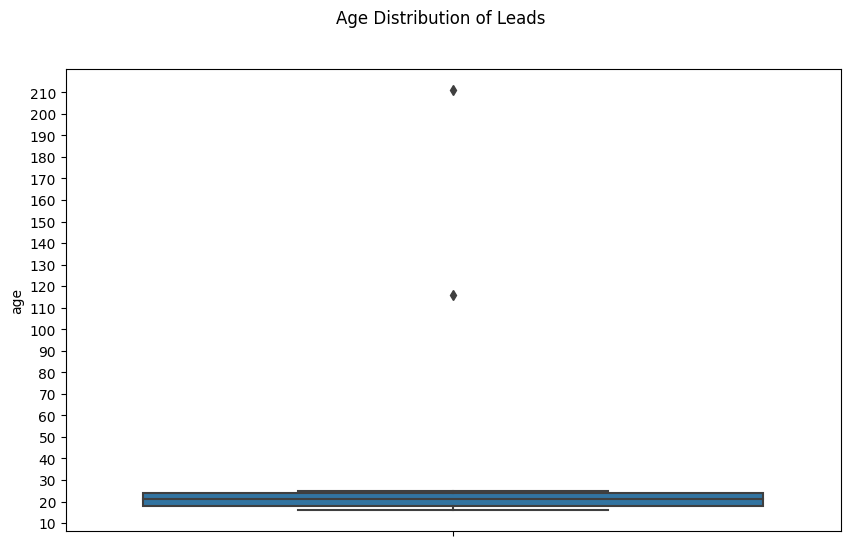

In [6]:
plt.figure(figsize=(10,6))
plt.suptitle("Age Distribution of Leads",color = 'Black')
ticks = np.arange(0,220,10)
label = ["{}".format(i) for i in ticks]
plt.yticks(ticks,label)
sns.boxplot(y=lbd.age)

plt.show()

There seems to be 2 outliers.So lets remove them.
Age seems to be between 15 to 25

In [7]:
lbd_outlier=lbd[lbd.age>100]
lbd_outlier

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
17,USR1018,211,MALE,Hyderabad,Degree,IT Employee,social_media
300,USR1301,116,FEMALE,Hyderabad,Intermediate,Private Employee,social_media


In [8]:
lbd=lbd.drop([17,300])
lbd.shape

(358, 7)

Age distribution after removing outliers

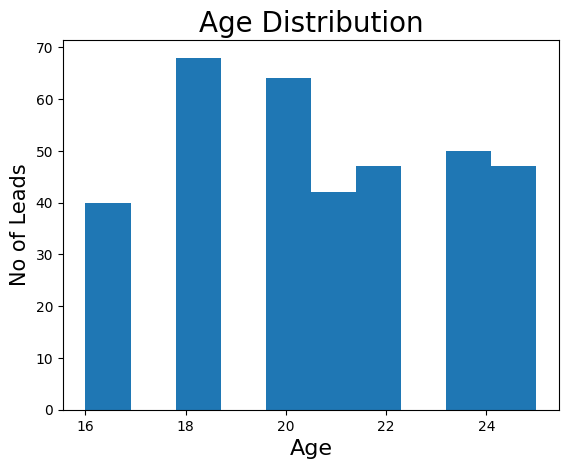

In [9]:
plt.hist(lbd['age'])
plt.title('Age Distribution', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('No of Leads', fontsize=15)
plt.show()

**Check For Missing Values**

In [10]:
lbd.isna().sum()

lead_id              0
age                  0
gender               0
current_city         0
current_education    0
parent_occupation    0
lead_gen_source      0
dtype: int64

so no null values in dataset

In [11]:
lbd.gender.value_counts()

FEMALE    198
MALE      160
Name: gender, dtype: int64

<Axes: >

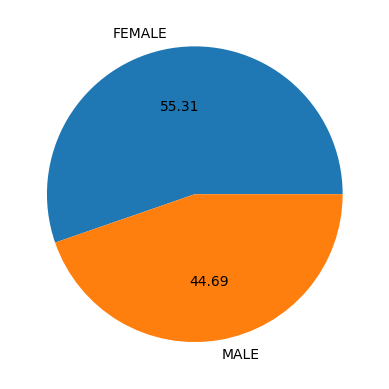

In [12]:
lbd.groupby('gender').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')


Female leads are more than male leads

In [13]:
lbd.current_city.value_counts()

Visakhapatnam    76
Hyderabad        75
Kochi            67
Bengaluru        51
Mumbai           48
Chennai          41
Name: current_city, dtype: int64

Seems to be no clear pattern here

Text(0.5, 1.0, 'Current Education')

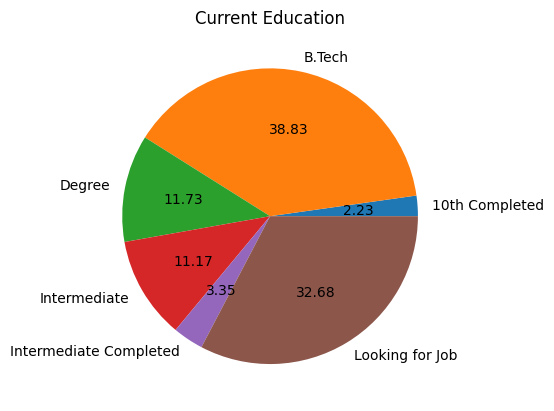

In [14]:
x = lbd.groupby('current_education').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
x.set_title("Current Education")


From the above chart we can say that most leads are from b.tech and looking for a job

Text(0.5, 1.0, 'Current Education')

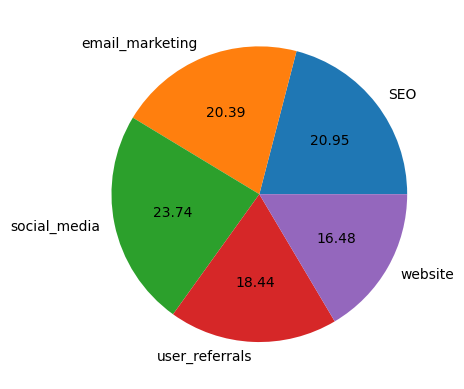

In [15]:
ax=lbd.groupby('lead_gen_source').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
x.set_title("Current Education")

Approx. 24% of the leads came to know about the firm through social media. Other major sources contributing are SEO and email_marketing which contribute around 20% each


In [16]:
lbd.to_csv('clean_leads_basic_details.csv')

In [17]:
uploaded1=files.upload()

Saving leads_demo_watched_details.csv to leads_demo_watched_details (1).csv


In [18]:
ldwd=pd.read_csv('leads_demo_watched_details.csv',parse_dates=['demo_watched_date'])
ldwd.head()

,lead_id,demo_watched_date,language,watched_percentage
0,USR1002,2022-01-04,Telugu,42
1,USR1003,2022-01-07,Telugu,81
2,USR1004,2022-01-02,Telugu,35
3,USR1005,2022-01-03,Hindi,38
4,USR1006,2022-01-12,Hindi,54


In [19]:
ldwd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   lead_id             194 non-null    object        
 1   demo_watched_date   194 non-null    datetime64[ns]
 2   language            194 non-null    object        
 3   watched_percentage  194 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.2+ KB


NO null values in dataset and datatype seems to be correct for columns needed

In [20]:
ldwd.describe()

,watched_percentage
count,194.000000
mean,56.634021
std,43.555635
min,2.000000
25%,35.000000
50%,55.500000
75%,75.750000
max,510.000000


max watched percentage in 510 which is not correct that means there are some outliers

In [21]:
ldwd_outliers=ldwd[ldwd.watched_percentage>100]
ldwd_outliers

,lead_id,demo_watched_date,language,watched_percentage
94,USR1138,2022-02-20,English,510
133,USR1213,2022-01-20,Telugu,233


**Removing Outliers**

In [22]:
ldwd=ldwd[ldwd.watched_percentage<=100]
ldwd.shape

(192, 4)

Text(0, 0.5, 'No of Leads watching video')

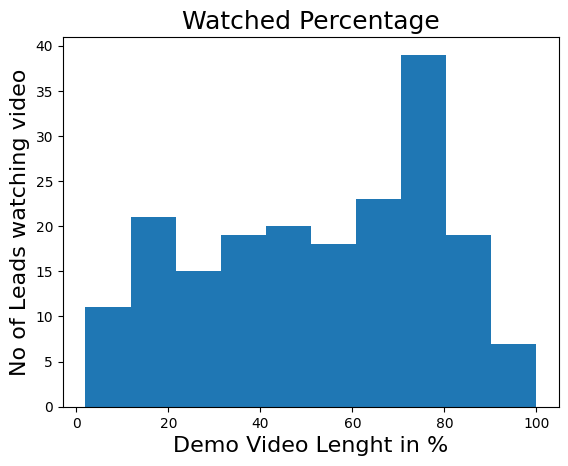

In [23]:
plt.hist(ldwd['watched_percentage'],bins=10)
plt.title('Watched Percentage', fontsize=18)
plt.xlabel('Demo Video Lenght in %', fontsize=16)
plt.ylabel('No of Leads watching video', fontsize=16)

1.From the plot we can derive that 10% watches the full demo video

2.70-80% have more than 35 leads

3.Through analysing the curve we can say majority of the leads population watch demo video over 50%


In [24]:
watched_describe = ldwd.drop(['demo_watched_date','lead_id','language'], axis=1)
watched_describe.describe()


,watched_percentage
count,192.000000
mean,53.354167
std,25.829477
min,2.000000
25%,34.250000
50%,55.000000
75%,75.000000
max,100.000000


In [25]:
merged_leads_demo = pd.merge(ldwd, lbd, how='inner', on = 'lead_id')
merged_leads_demo .head(5)

,lead_id,demo_watched_date,language,watched_percentage,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1002,2022-01-04,Telugu,42,20,MALE,Bengaluru,B.Tech,Business,user_referrals
1,USR1003,2022-01-07,Telugu,81,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
2,USR1004,2022-01-02,Telugu,35,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
3,USR1005,2022-01-03,Hindi,38,16,MALE,Chennai,Intermediate,Government Employee,user_referrals
4,USR1006,2022-01-12,Hindi,54,16,MALE,Kochi,Intermediate,Doctor,user_referrals


In [26]:
merged_leads_demo.groupby(['language', 'current_city']).size()


language  current_city 
English   Bengaluru        22
          Chennai          17
          Hyderabad        20
          Kochi            19
          Mumbai           11
          Visakhapatnam    22
Hindi     Bengaluru         3
          Chennai           6
          Hyderabad         3
          Kochi             4
          Mumbai            1
          Visakhapatnam     2
Telugu    Bengaluru         7
          Chennai           7
          Hyderabad        17
          Kochi             8
          Mumbai            7
          Visakhapatnam    15
dtype: int64

**English is most used language and telugu is most used in Hydrabad and Visakhapatnam**

Text(0.5, 1.0, 'Demo Language')

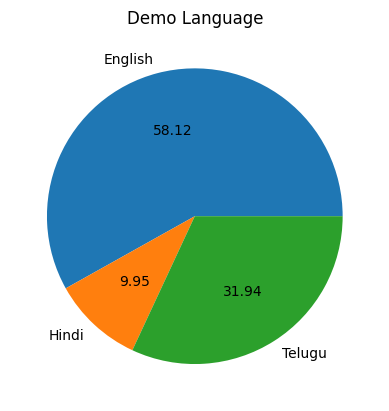

In [27]:
x = merged_leads_demo.groupby('language').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
x.set_title("Demo Language")


From the above pie we can conclude around 57.5% of customers prefer watching Demo Video in English making it the major language. Around 32% of the leads population prefer watching Demo in Telegu and the remaining 10% prefer Hindi

In [30]:
uploded2=files.upload()

Saving leads_interaction_details.csv to leads_interaction_details (1).csv


In [31]:
lid=pd.read_csv('leads_interaction_details.csv')
lid.head()

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup


In [32]:
lid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jnr_sm_id       2192 non-null   object
 1   lead_id         2192 non-null   object
 2   lead_stage      2192 non-null   object
 3   call_done_date  2192 non-null   object
 4   call_status     2192 non-null   object
 5   call_reason     2192 non-null   object
dtypes: object(6)
memory usage: 102.9+ KB


In [33]:
lid.describe()

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
count,2192,2192,2192,2192,2192,2192
unique,16,358,4,40,2,8
top,JNR1012MG,USR1193,lead,1/8/2022,successful,demo_not_attended
freq,164,11,1547,156,1866,701


In [37]:
merged_interaction_demo = pd.merge(ldwd, lid, how='inner', on = 'lead_id')
merged_interaction_demo.head()

,lead_id,demo_watched_date,language,watched_percentage,jnr_sm_id,lead_stage,call_done_date,call_status,call_reason
0,USR1002,2022-01-04,Telugu,42,JNR1001MG,lead,1/3/2022,successful,lead_introduction
1,USR1002,2022-01-04,Telugu,42,JNR1001MG,lead,1/4/2022,successful,demo_schedule
2,USR1002,2022-01-04,Telugu,42,JNR1001MG,awareness,1/5/2022,successful,post_demo_followup
3,USR1002,2022-01-04,Telugu,42,JNR1001MG,awareness,1/6/2022,successful,followup_for_consideration
4,USR1002,2022-01-04,Telugu,42,JNR1001MG,consideration,1/7/2022,successful,interested_for_conversion


In [38]:
merged_interaction_demo.groupby([ 'lead_stage','call_status']).size()

lead_stage     call_status 
awareness      successful      243
               unsuccessful      5
consideration  successful      288
               unsuccessful     40
conversion     successful       63
lead           successful      769
               unsuccessful    152
dtype: int64

Conversion stage has 100% of its call successful.Therefore it can be said that the last stage of acquisition gives 100% outcome, also overall we can see no of successful calls> no of unsuccessful calls throughout the process.


In [40]:
merged_interaction_demo.groupby([ 'call_status','call_reason']).size()

call_status   call_reason               
successful    demo_not_attended             385
              demo_schedule                 192
              followup_for_consideration     48
              followup_for_conversion       168
              interested_for_conversion     120
              lead_introduction             192
              post_demo_followup            195
              successful_conversion          63
unsuccessful  demo_not_attended              45
              demo_schedule                  15
              followup_for_consideration      5
              followup_for_conversion        19
              interested_for_conversion      21
              lead_introduction              92
dtype: int64

Sales managers require to focus on earlier stages of acquisition process


In [41]:
uploded3=files.upload()

Saving leads_reasons_for_no_interest.csv to leads_reasons_for_no_interest.csv


In [42]:
lrni=pd.read_csv('leads_reasons_for_no_interest.csv')
lrni.head()

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
0,USR1001,No time for student,NaN,NaN
1,USR1003,NaN,No time for student,NaN
2,USR1004,NaN,Wants offline classes,NaN
3,USR1005,NaN,Can't afford,NaN
4,USR1006,NaN,Student not interested in domain,NaN


In [43]:
lrni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   lead_id                                 294 non-null    object
 1   reasons_for_not_interested_in_demo      164 non-null    object
 2   reasons_for_not_interested_to_consider  79 non-null     object
 3   reasons_for_not_interested_to_convert   51 non-null     object
dtypes: object(4)
memory usage: 9.3+ KB


In [44]:
lrni.describe()

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
count,294,164,79,51
unique,294,6,5,5
top,USR1001,Wants offline classes,Can't afford,Can't afford
freq,1,56,32,19


In [45]:
lrni.groupby('reasons_for_not_interested_in_demo').size()

reasons_for_not_interested_in_demo
Can't afford                        44
Cannot afford                        4
No time for student                 27
Student not interested in domain    28
Wants offline classes               56
Will join in final year              5
dtype: int64

Text(0.5, 1.0, 'Distribution of Reasons for not interested in demo')

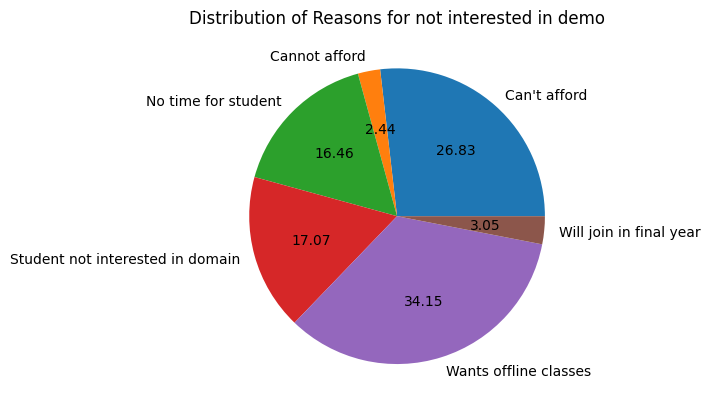

In [47]:
x = lrni.groupby('reasons_for_not_interested_in_demo').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
x.set_title("Distribution of Reasons for not interested in demo")

so top reason for not being intrested in demo are:

1.   Wants offline classes
2.   Can't afford
3.   no time for student
4.   Student not intrested in domain

Text(0.5, 1.0, 'Distribution of Reasons for not interested to consider')

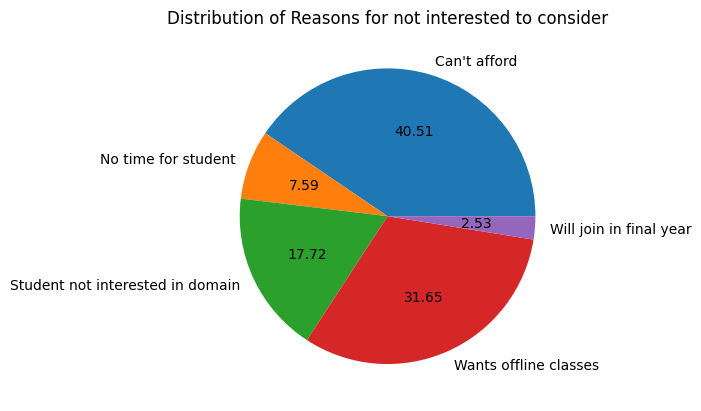

In [48]:
x = lrni.groupby('reasons_for_not_interested_to_consider').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
x.set_title("Distribution of Reasons for not interested to consider")

**Major reasons for leads dropping out are because of affordibility issues and prefering offline classes over online classes**

In [49]:
uploded4=files.upload()

Saving sales_managers_assigned_leads_details.csv to sales_managers_assigned_leads_details.csv


In [50]:
smald=pd.read_csv('sales_managers_assigned_leads_details.csv')
smald.head()

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
0,SNR501MG,JNR1001MG,1/1/2022,1,USR1001
1,SNR501MG,JNR1001MG,1/1/2022,1,USR1002
2,SNR501MG,JNR1001MG,1/1/2022,1,USR1003
3,SNR501MG,JNR1001MG,1/1/2022,1,USR1004
4,SNR501MG,JNR1001MG,1/1/2022,1,USR1005


In [51]:
smald.groupby([ 'snr_sm_id','jnr_sm_id']).size()

snr_sm_id  jnr_sm_id
SNR501MG   JNR1001MG    34
           JNR1002MG    20
           JNR1003MG    20
           JNR1004MG    20
SNR502MG   JNR1005MG    20
           JNR1006MG    20
           JNR1007MG    20
           JNR1008MG    20
SNR503MG   JNR1009MG    20
           JNR1010MG    21
           JNR1011MG    26
           JNR1012MG    31
SNR504MG   JNR1013MG    20
           JNR1014MG    20
           JNR1015MG    21
           JNR1016MG    27
dtype: int64

[Text(0.5, 1.0, 'Average distribution Juniour Sales Managers to Senior Sales Managers'),
 Text(0, 0.5, 'No of Junior Sales Managers'),
 Text(0.5, 0, 'Senior Managers')]

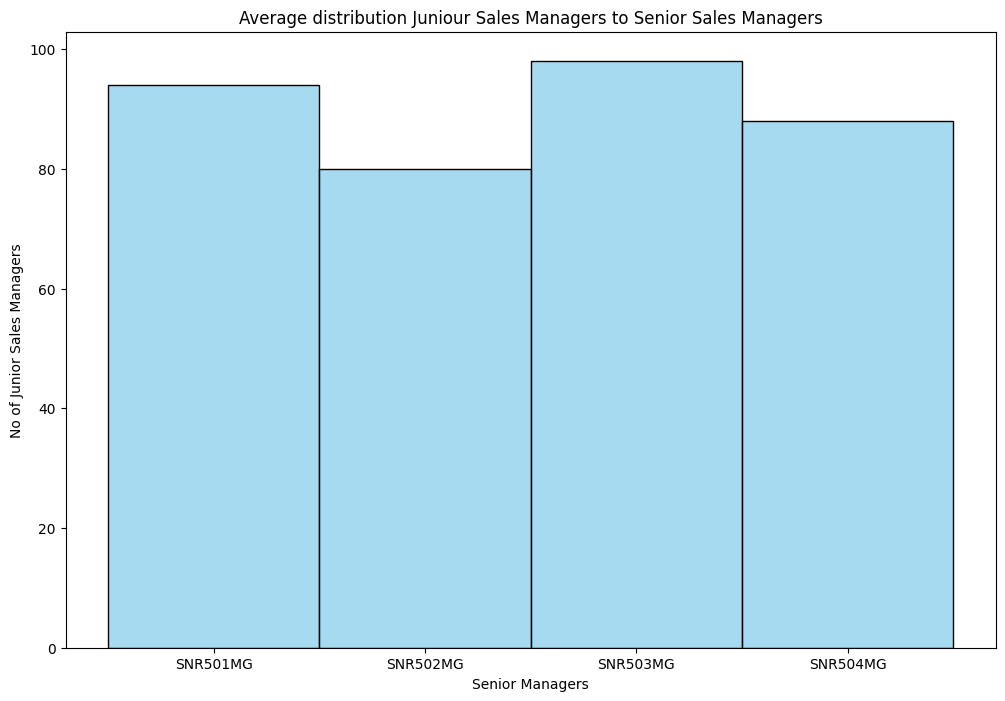

In [53]:
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.histplot(data=smald["snr_sm_id"],bins=4,color="skyblue")
ax.set(title="Average distribution Juniour Sales Managers to Senior Sales Managers",ylabel="No of Junior Sales Managers",xlabel="Senior Managers")

**Number of Junior Sales Managers are evenly assigned among Senior Sales Managers. Here we have total of 4 senior Managers**

In [54]:
acquired_leads=lid[lid['call_reason'] == "successful_conversion"]['lead_id'].nunique()
acquired_leads

64

In [55]:
total_no_of_leads=lid.lead_id.nunique()
total_no_of_leads

358

In [56]:
percent_of_leads_acquired=acquired_leads/total_no_of_leads*100
print(percent_of_leads_acquired)

17.877094972067038


In [57]:
no_of_leads_acquired=np.array([acquired_leads, total_no_of_leads-acquired_leads])
no_of_leads_acquired

array([ 64, 294])

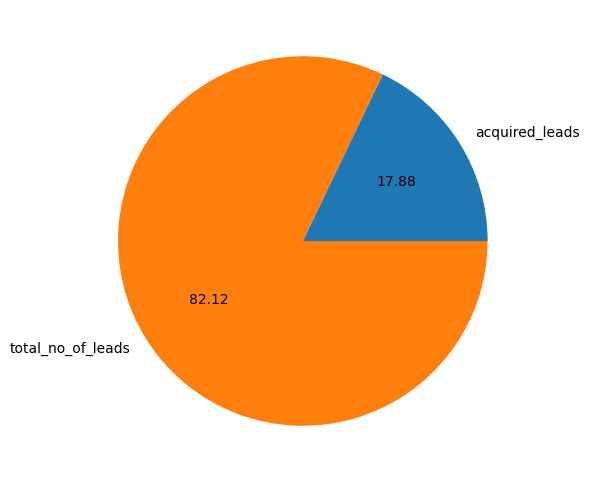

In [59]:
fig,ax=plt.subplots(figsize=(12,6))
ax.pie(no_of_leads_acquired,labels=["acquired_leads","total_no_of_leads"],autopct='%.2f')
plt.title="Percentage"

**Approximately 17.88% ie around 18% of customer acquisition is successfully done by the team**

Work needs to be done at the primary stages to imbibe curiosity among the leads to watch Demo Videos
